In [1]:
import numpy as np
from graphix import Circuit
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
circuit = Circuit(4)

# prepare all qubits in |0> for easier comparison with original algorithm
for i in range(4):
    circuit.h(i)

# initialization
circuit.h(0)
circuit.h(1)
circuit.h(2)

# prepare ancilla
circuit.x(3)
circuit.h(3)

# balanced oracle - flip qubits 0 and 2
circuit.x(0)
circuit.x(2)

# algorithm
circuit.cnot(0, 3)
circuit.cnot(1, 3)
circuit.cnot(2, 3)

circuit.x(0)
circuit.x(2)

circuit.h(0)
circuit.h(1)
circuit.h(2)

N, node = 0
N, node = 1
N, node = 2
N, node = 3
N, node = 4
E, nodes = (0, 4)
M, node = 0, plane = XY, angle(pi) = 0, s-domain = [], t_domain = []
X byproduct, node = 4, domain = [0]
N, node = 5
E, nodes = (1, 5)
M, node = 1, plane = XY, angle(pi) = 0, s-domain = [], t_domain = []
X byproduct, node = 5, domain = [1]
N, node = 6
E, nodes = (2, 6)
M, node = 2, plane = XY, angle(pi) = 0, s-domain = [], t_domain = []
103 more commands truncated. Change lim argument of print_pattern() to show more


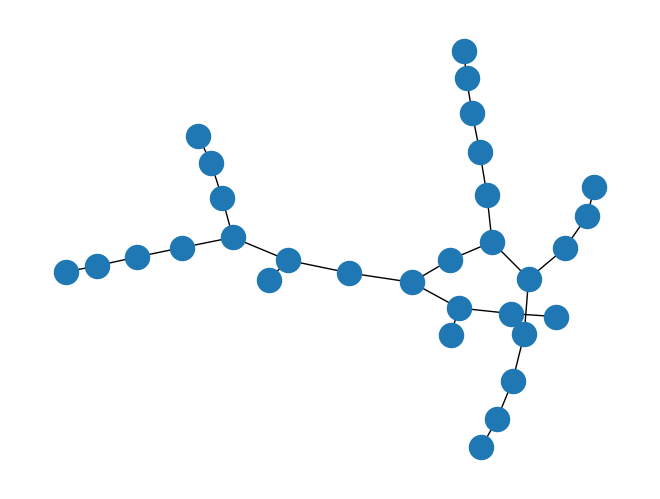

In [3]:
pattern = circuit.transpile()
pattern.print_pattern(lim=15)
nodes, edges = pattern.get_graph()
g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
np.random.seed(100)
nx.draw(g)
plt.show()

In [4]:
pattern.standardize()
pattern.shift_signals()
pattern.print_pattern(lim=15)

N, node = 0
N, node = 1
N, node = 2
N, node = 3
N, node = 4
N, node = 5
N, node = 6
N, node = 7
N, node = 8
N, node = 9
N, node = 10
N, node = 11
N, node = 12
N, node = 13
N, node = 14
81 more commands truncated. Change lim argument of print_pattern() to show more


N, node = 23
N, node = 28
N, node = 29
N, node = 30
Clifford, node = 28, Clifford index = 8
Clifford, node = 29, Clifford index = 8
Clifford, node = 30, Clifford index = 8
Clifford, node = 23, Clifford index = 3


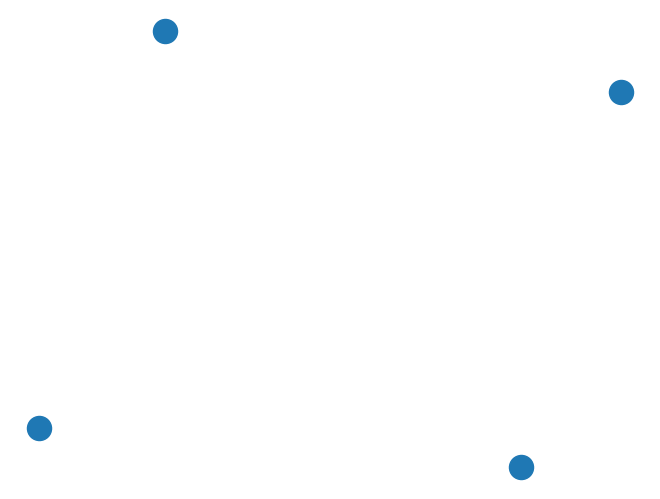

In [5]:
pattern.perform_pauli_measurements()
pattern.print_pattern(lim=16, filter=["N", "M", "C"])
nodes, edges = pattern.get_graph()
g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
np.random.seed(100)
nx.draw(g)
plt.show()

In [6]:
out_state = pattern.simulate_pattern()
state = circuit.simulate_statevector()
print("overlap of states: ", np.abs(np.dot(state.psi.flatten().conjugate(), out_state.psi.flatten())))

overlap of states:  0.9999999999999992
